In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import time
%matplotlib inline

#### Определяем распределение и выборку объема 1000

In [153]:
expect=2
rv = sts.expon(scale=expect)
sample = rv.rvs(size = 1000)

#### Рисуем гистограмму выборки и плотность

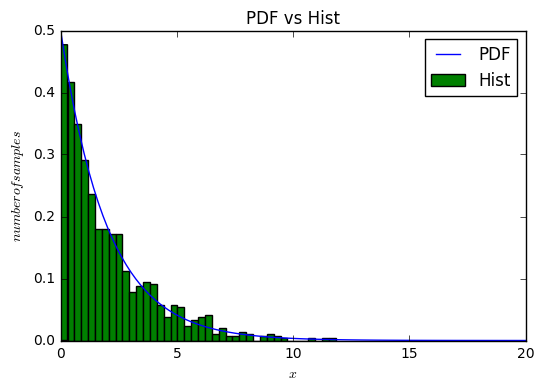

In [154]:
x = np.linspace(0,20,100)
pdf = rv.pdf(x)
plt.plot(x, pdf, label="PDF")
plt.title("PDF vs Hist")

plt.hist(sample,bins= 40, normed=True, label="Hist")
plt.legend()
plt.ylabel('$number of samples$')
plt.xlabel('$x$')


#### Генерируем 4 выборки объема 1000 средних значений и рисуем их гистограммы вместе с плотностями соответсвующих нормальных распределений

Математическое ожидание нормального распределения совпадает с мат.ожиданием исходного экспоненциального распределения.
Дисперсия равна дисперсии исходного экспоненциального распределения, деленной на N.

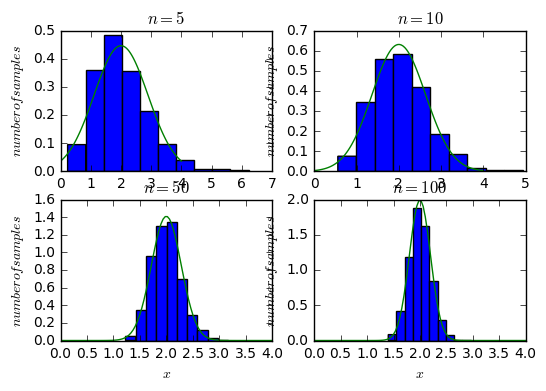

In [144]:

def f(x,n):
    return np.mean(rv.rvs(size = n))

i = 1
x = np.linspace(0,4,100)

for N in [5,10,50,100]: 
    
    rvn = sts.norm(expect,expect/math.sqrt(N))
    pdf = rvn.pdf(x)
        
    X_mean = np.zeros(1000)
    X_mean = map(lambda x,n: np.mean(rv.rvs(size = n)),X_mean,N*np.ones(1000,dtype=int))
    plt.subplot(2,2,i)
    plt.hist(list(X_mean) , normed=True)
    
    plt.plot(x, pdf, label="PDF")
    
    plt.ylabel('$number of samples$')
    plt.xlabel('$x$')
    i = i+1
    plt.title("$n=%s$" % N)

#### Выводы

При увеличении кол-ва элементов выборки уменьшается дисперсия нормального распределения, из-за этого график плотности сужается 
и вытягивается вверх. Точность аппроксимации улучшается.
